In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv('vgsales.csv', delimiter=',')
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [9]:
df.dropna(how="any",inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [10]:
df.Year = df.Year.astype(int)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [12]:
df['Genre'].value_counts()

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

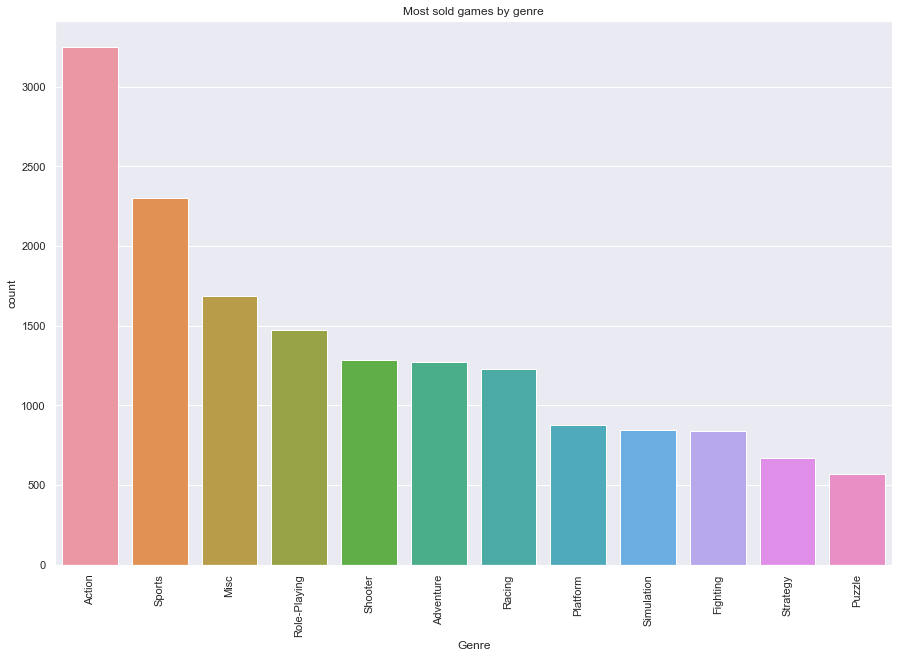

In [44]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Genre", data=df, order = df['Genre'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Most sold games by genre")
plt.show()

Text(0.5, 1.0, 'Which year had the most games released?')

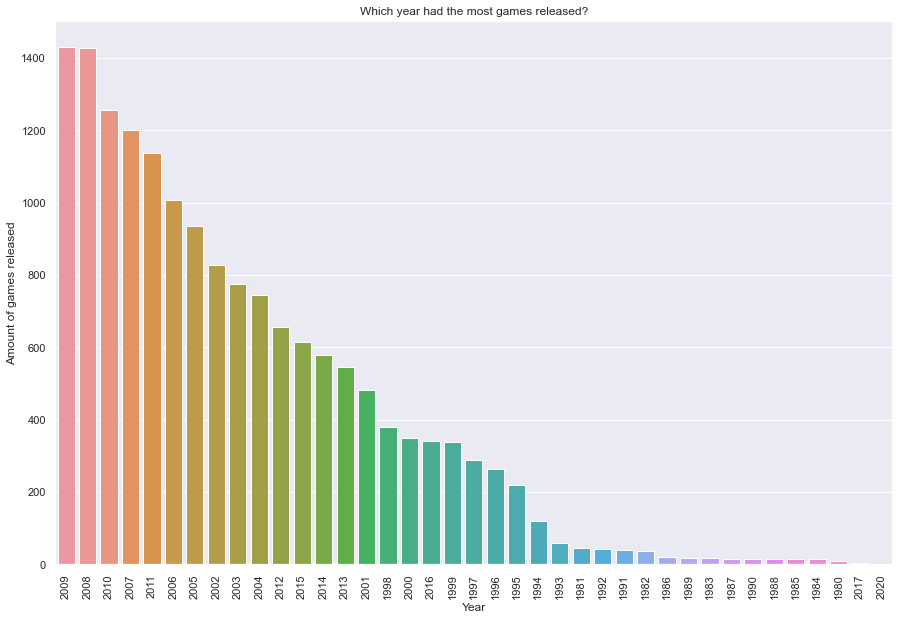

In [25]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Year", data=df, order = df.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index)
plt.ylabel("Amount of games released")
plt.xticks(rotation=90)
plt.title("Which year had the most games released?")

In [26]:
genre = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
map = genre.groupby(by=['Genre']).sum()

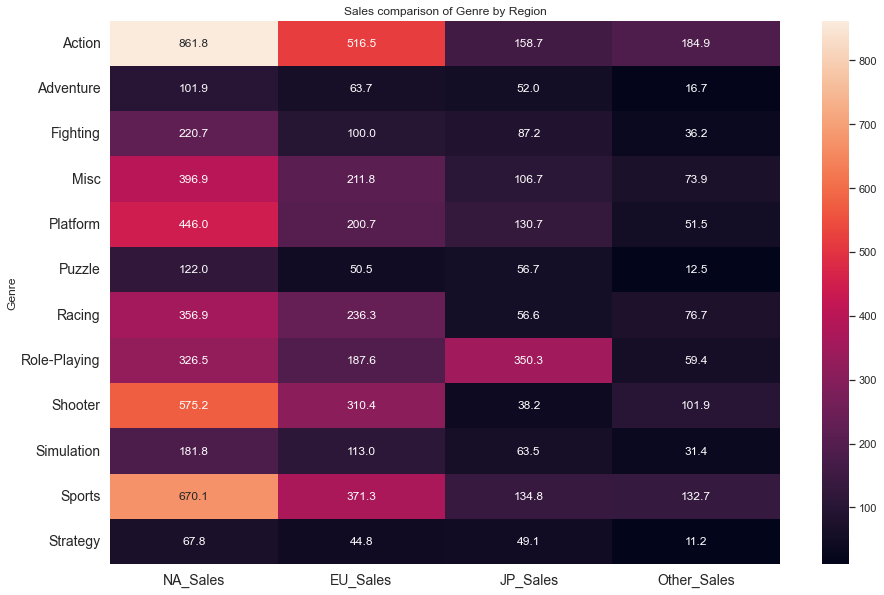

In [43]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(map, annot=True, fmt = '.1f')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Sales comparison of Genre by Region")
plt.show()

In [28]:
top_game_sale = df.head(20)
top_game_sale = top_game_sale[['Name', 'Year', 'Genre', 'Global_Sales']]
top_game_sale = top_game_sale.sort_values(by=['Global_Sales'], ascending=False)

In [29]:
name = top_game_sale['Name']
year = top_game_sale['Year']
y = np.arange(0, 20)

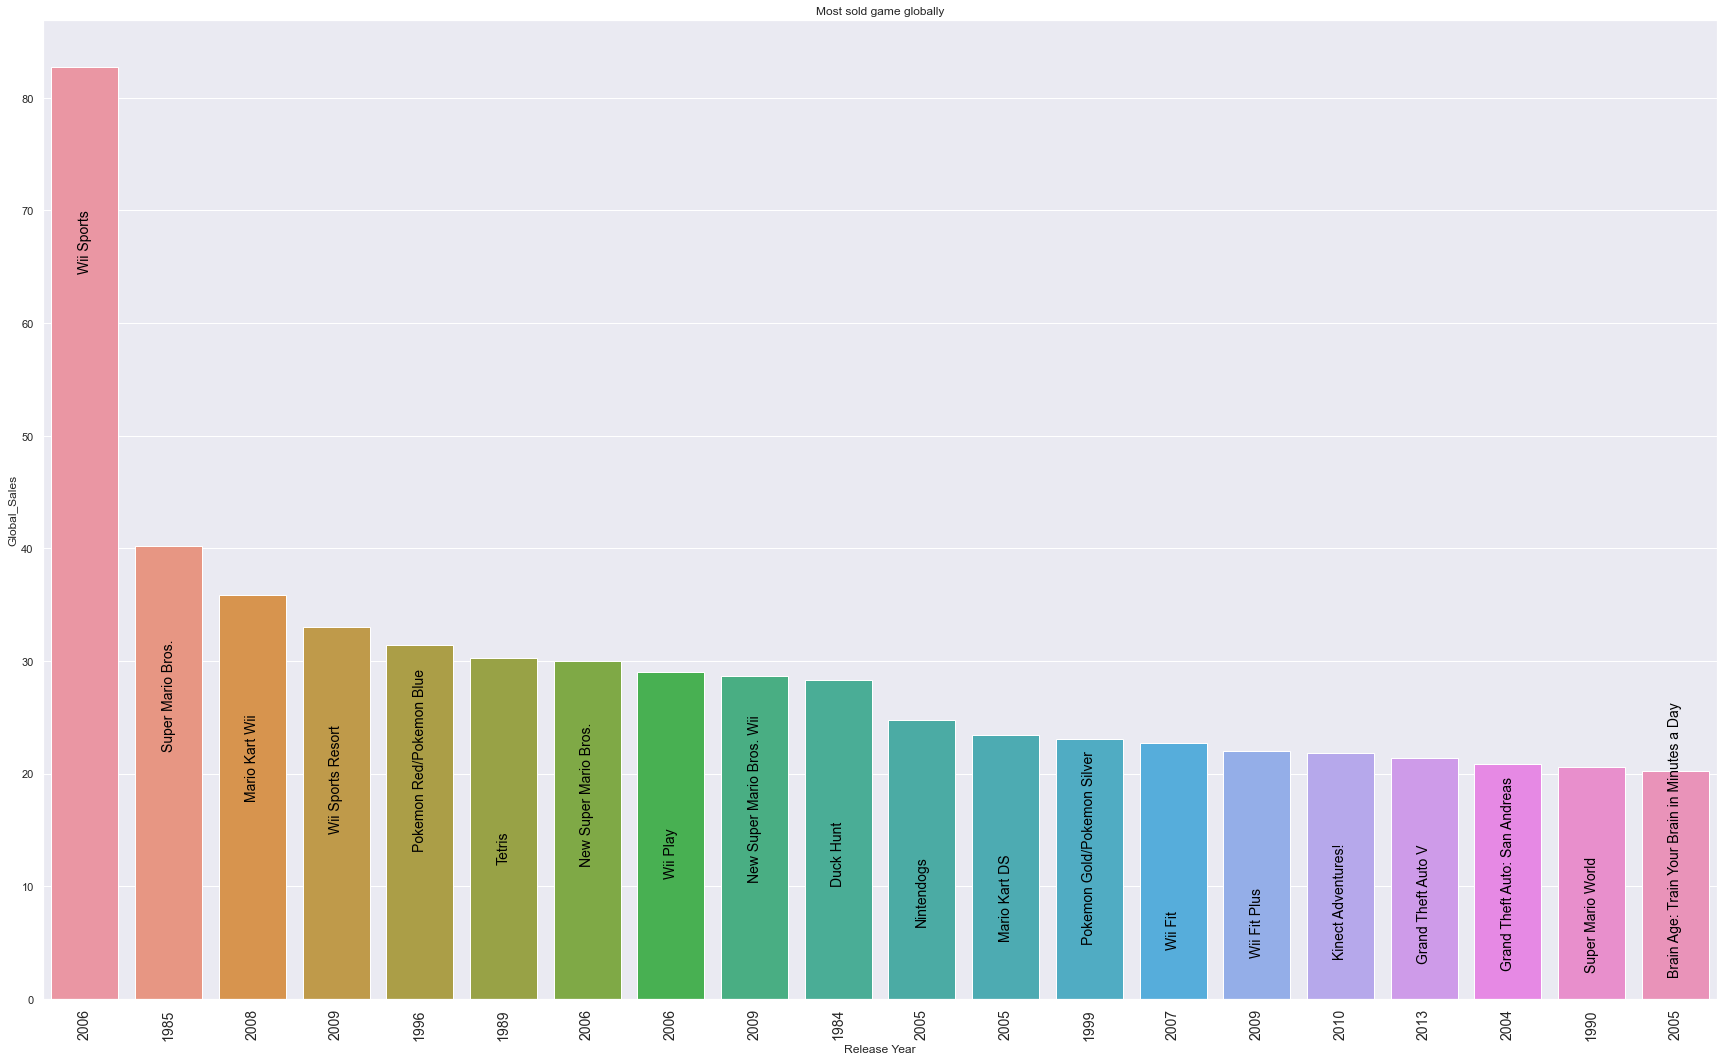

In [31]:
plt.figure(figsize=(30, 18))
g = sns.barplot(x='Name', y='Global_Sales', data=top_game_sale)
index = 0
for value in top_game_sale['Global_Sales']:
    g.text(index, value - 18, name[index], color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(y, top_game_sale['Year'], fontsize=14, rotation=90)
plt.xlabel('Release Year')
plt.title("Most sold game globally")
plt.show()

In [33]:
comp_platform = df[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_platform.head()

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Wii,41.49,29.02,3.77,8.46
1,NES,29.08,3.58,6.81,0.77
2,Wii,15.85,12.88,3.79,3.31
3,Wii,15.75,11.01,3.28,2.96
4,GB,11.27,8.89,10.22,1.00


In [34]:
comp_platform = comp_platform.groupby(by=['Platform']).sum().reset_index()

In [35]:
comp_table = pd.melt(comp_platform, id_vars=['Platform'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()

,Platform,Sale_Area,Sale_Price
0,2600,NA_Sales,80.78
1,3DO,NA_Sales,0.00
2,3DS,NA_Sales,78.03
3,DC,NA_Sales,5.43
4,DS,NA_Sales,388.53


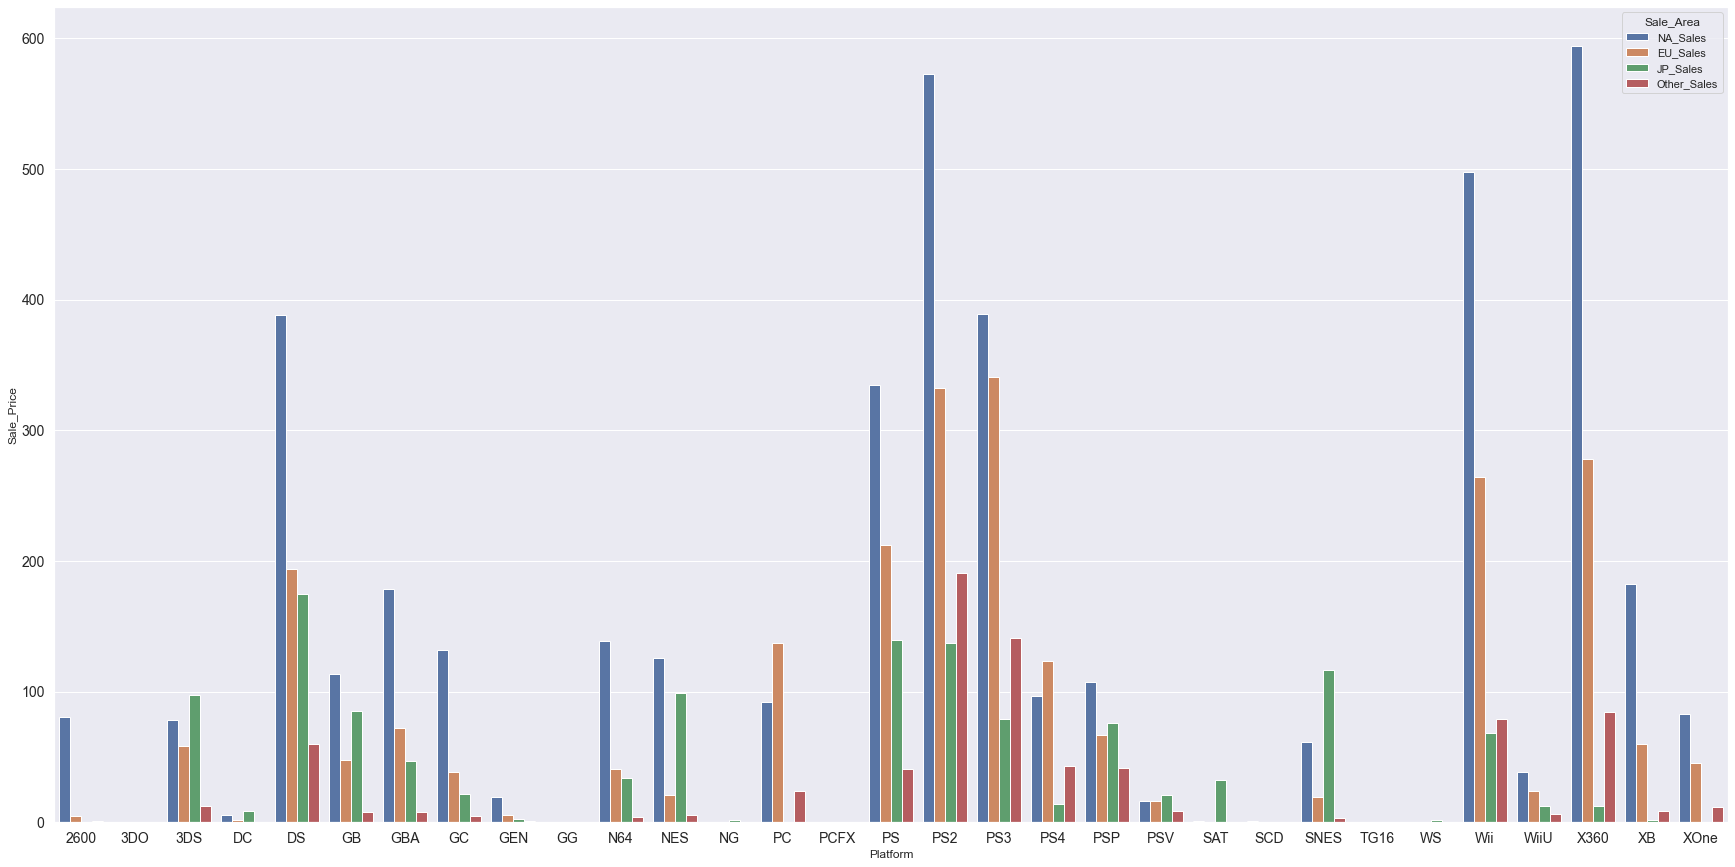

In [36]:
plt.figure(figsize=(30, 15))
sns.barplot(x='Platform', y='Sale_Price', hue='Sale_Area', data=comp_table)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [37]:
top_publisher = df.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).head(20)
top_publisher = pd.DataFrame(top_publisher).reset_index()

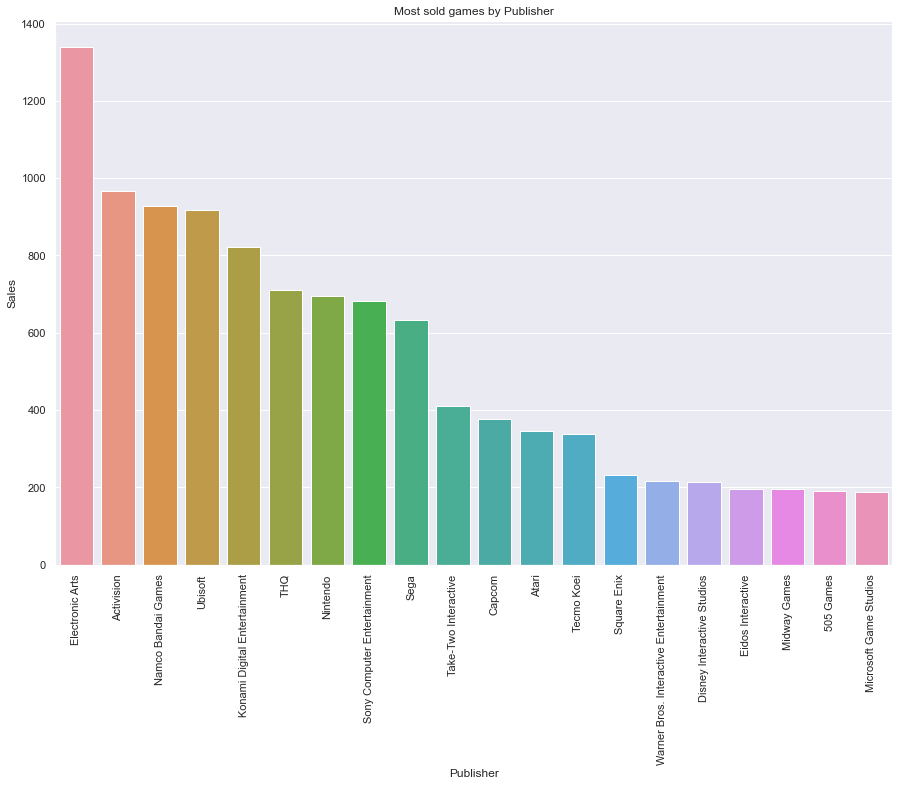

In [47]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Publisher", data=df, order = df.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation=90)
plt.ylabel("Sales")
plt.title("Most sold games by Publisher")
plt.show()

<AxesSubplot:xlabel='Year', ylabel='Global_Sales'>

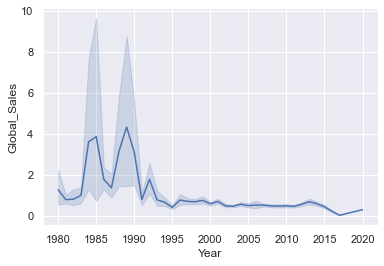

In [49]:
sns.lineplot(data=df, x="Year", y="Global_Sales")

In [50]:
data_pair = df.loc[:,["Year","Platform", "Genre", "NA_Sales","EU_Sales", "Other_Sales"]]
data_pair

,Year,Platform,Genre,NA_Sales,EU_Sales,Other_Sales
0,2006,Wii,Sports,41.49,29.02,8.46
1,1985,NES,Platform,29.08,3.58,0.77
2,2008,Wii,Racing,15.85,12.88,3.31
3,2009,Wii,Sports,15.75,11.01,2.96
4,1996,GB,Role-Playing,11.27,8.89,1.00
...,...,...,...,...,...,...
16593,2002,GBA,Platform,0.01,0.00,0.00
16594,2003,GC,Shooter,0.01,0.00,0.00
16595,2008,PS2,Racing,0.00,0.00,0.00
16596,2010,DS,Puzzle,0.00,0.01,0.00


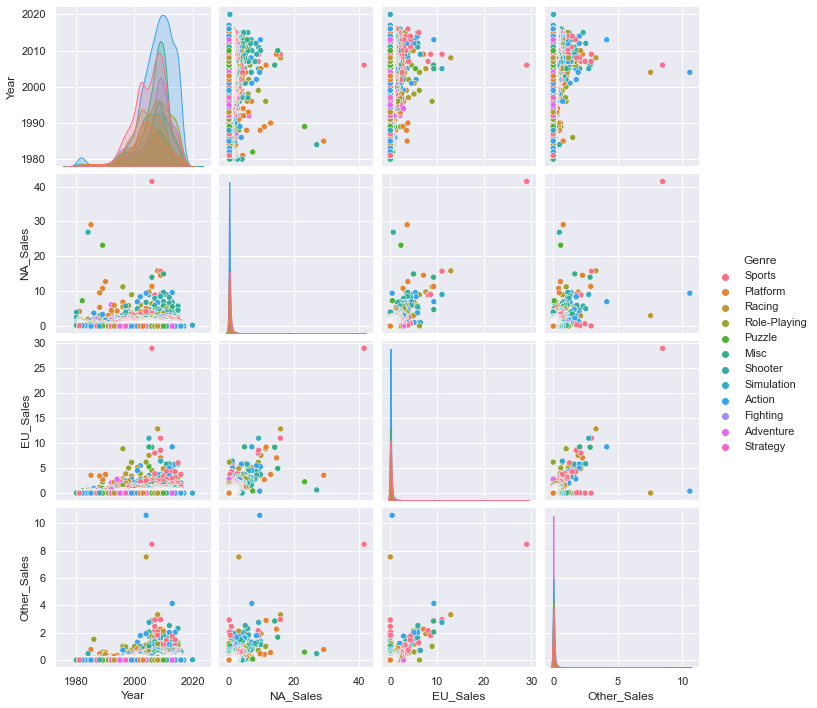

In [51]:
sns.pairplot(data_pair, hue='Genre')